In [1]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from  scipy import stats


# Objetivo del documento 
****
Este documento tiene como fin el exponer el como funcionana los **modelos no supervisados** en un enfoque practico, donde atravez de un ejemplo exploraremos el analisis, desarrollo y solucion del problema planteado.

## Problematica escogida:
La problematica que se escogio esta basada a un grupo de datos que encontrara en [kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python), el cual nos pone en los zapatos de un analista de supermercado, que quiere generar grupos por beneficios a sus clientes basandose en sus costrumbres de consumo presentes en la tienda; para ello cuenta con la siguieente informacion:


<table>
    <thead>
    <tr>
        <th> Columna</th>
        <th>Definicion</th>
        <th>Valores</th>
    <tr>
    </thead>
    <tbody>
    <tr>
        <th>Customer ID</th>
        <th>Identificador del cliente a anlizar<th>
        <tb>1 -200<tb>
    </tr>
    <tr>
        <th>Gender</th>
        <th>Genero del cliente<th>
        <tb>Male / Female</tb>
    </tr>
    <tr>
        <th>Age</th>
        <th>Edad del cliente<th>
        <tb> 18 - 70</tb>
    </tr>
    <tr>
        <th>Annual Income</th>
        <th>Ingresos anuales<th>
        <tb>$15.000 - $137.000<tb>
    </tr>
    <tr>
        <th>Spedding Score</th>
        <th>Puntaje asignado al cliente baandose en su comportamiento de gasto<th>
        <tb>1 - 100</tb>
    </tr>
    </tbody>
</table>

In [2]:
#lectura de los datos
dt = pd.read_csv('Mall_Customers.csv')
dt.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA 
***
Como siempre empezaremos evaluando los modelos buscando datos nuelos, atipicos entre otros

#### Datos nulos

In [3]:
dt.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Deteccion de datos atipicos

In [4]:
def Datos_atipicos(dataset,num_x,num_y):
    columns_dt =dataset.columns

    # Creacion de la grafica 
    fig, ax = plt.subplots(num_x, num_y, figsize=(30, 20))  
    # ajusta el tamaño de la figura según tus necesidades
    count = 0
    for x in range(0, num_x):
        for y in range(0, num_y):
            try:
                boxes = dataset.groupby(columns_dt[count]).count()[columns_dt[0]]
                sns.boxplot(boxes, ax=ax[x, y])
                ax[x, y].set_title(columns_dt[count])  # agrega un título al subgráfico
                count += 1
            except:
                boxes = dataset.groupby(columns_dt[count]).count()[columns_dt[-1]]
                sns.boxplot(boxes, ax=ax[x, y])
                ax[x, y].set_title(columns_dt[count])  # agrega un título al subgráfico
                count +=1


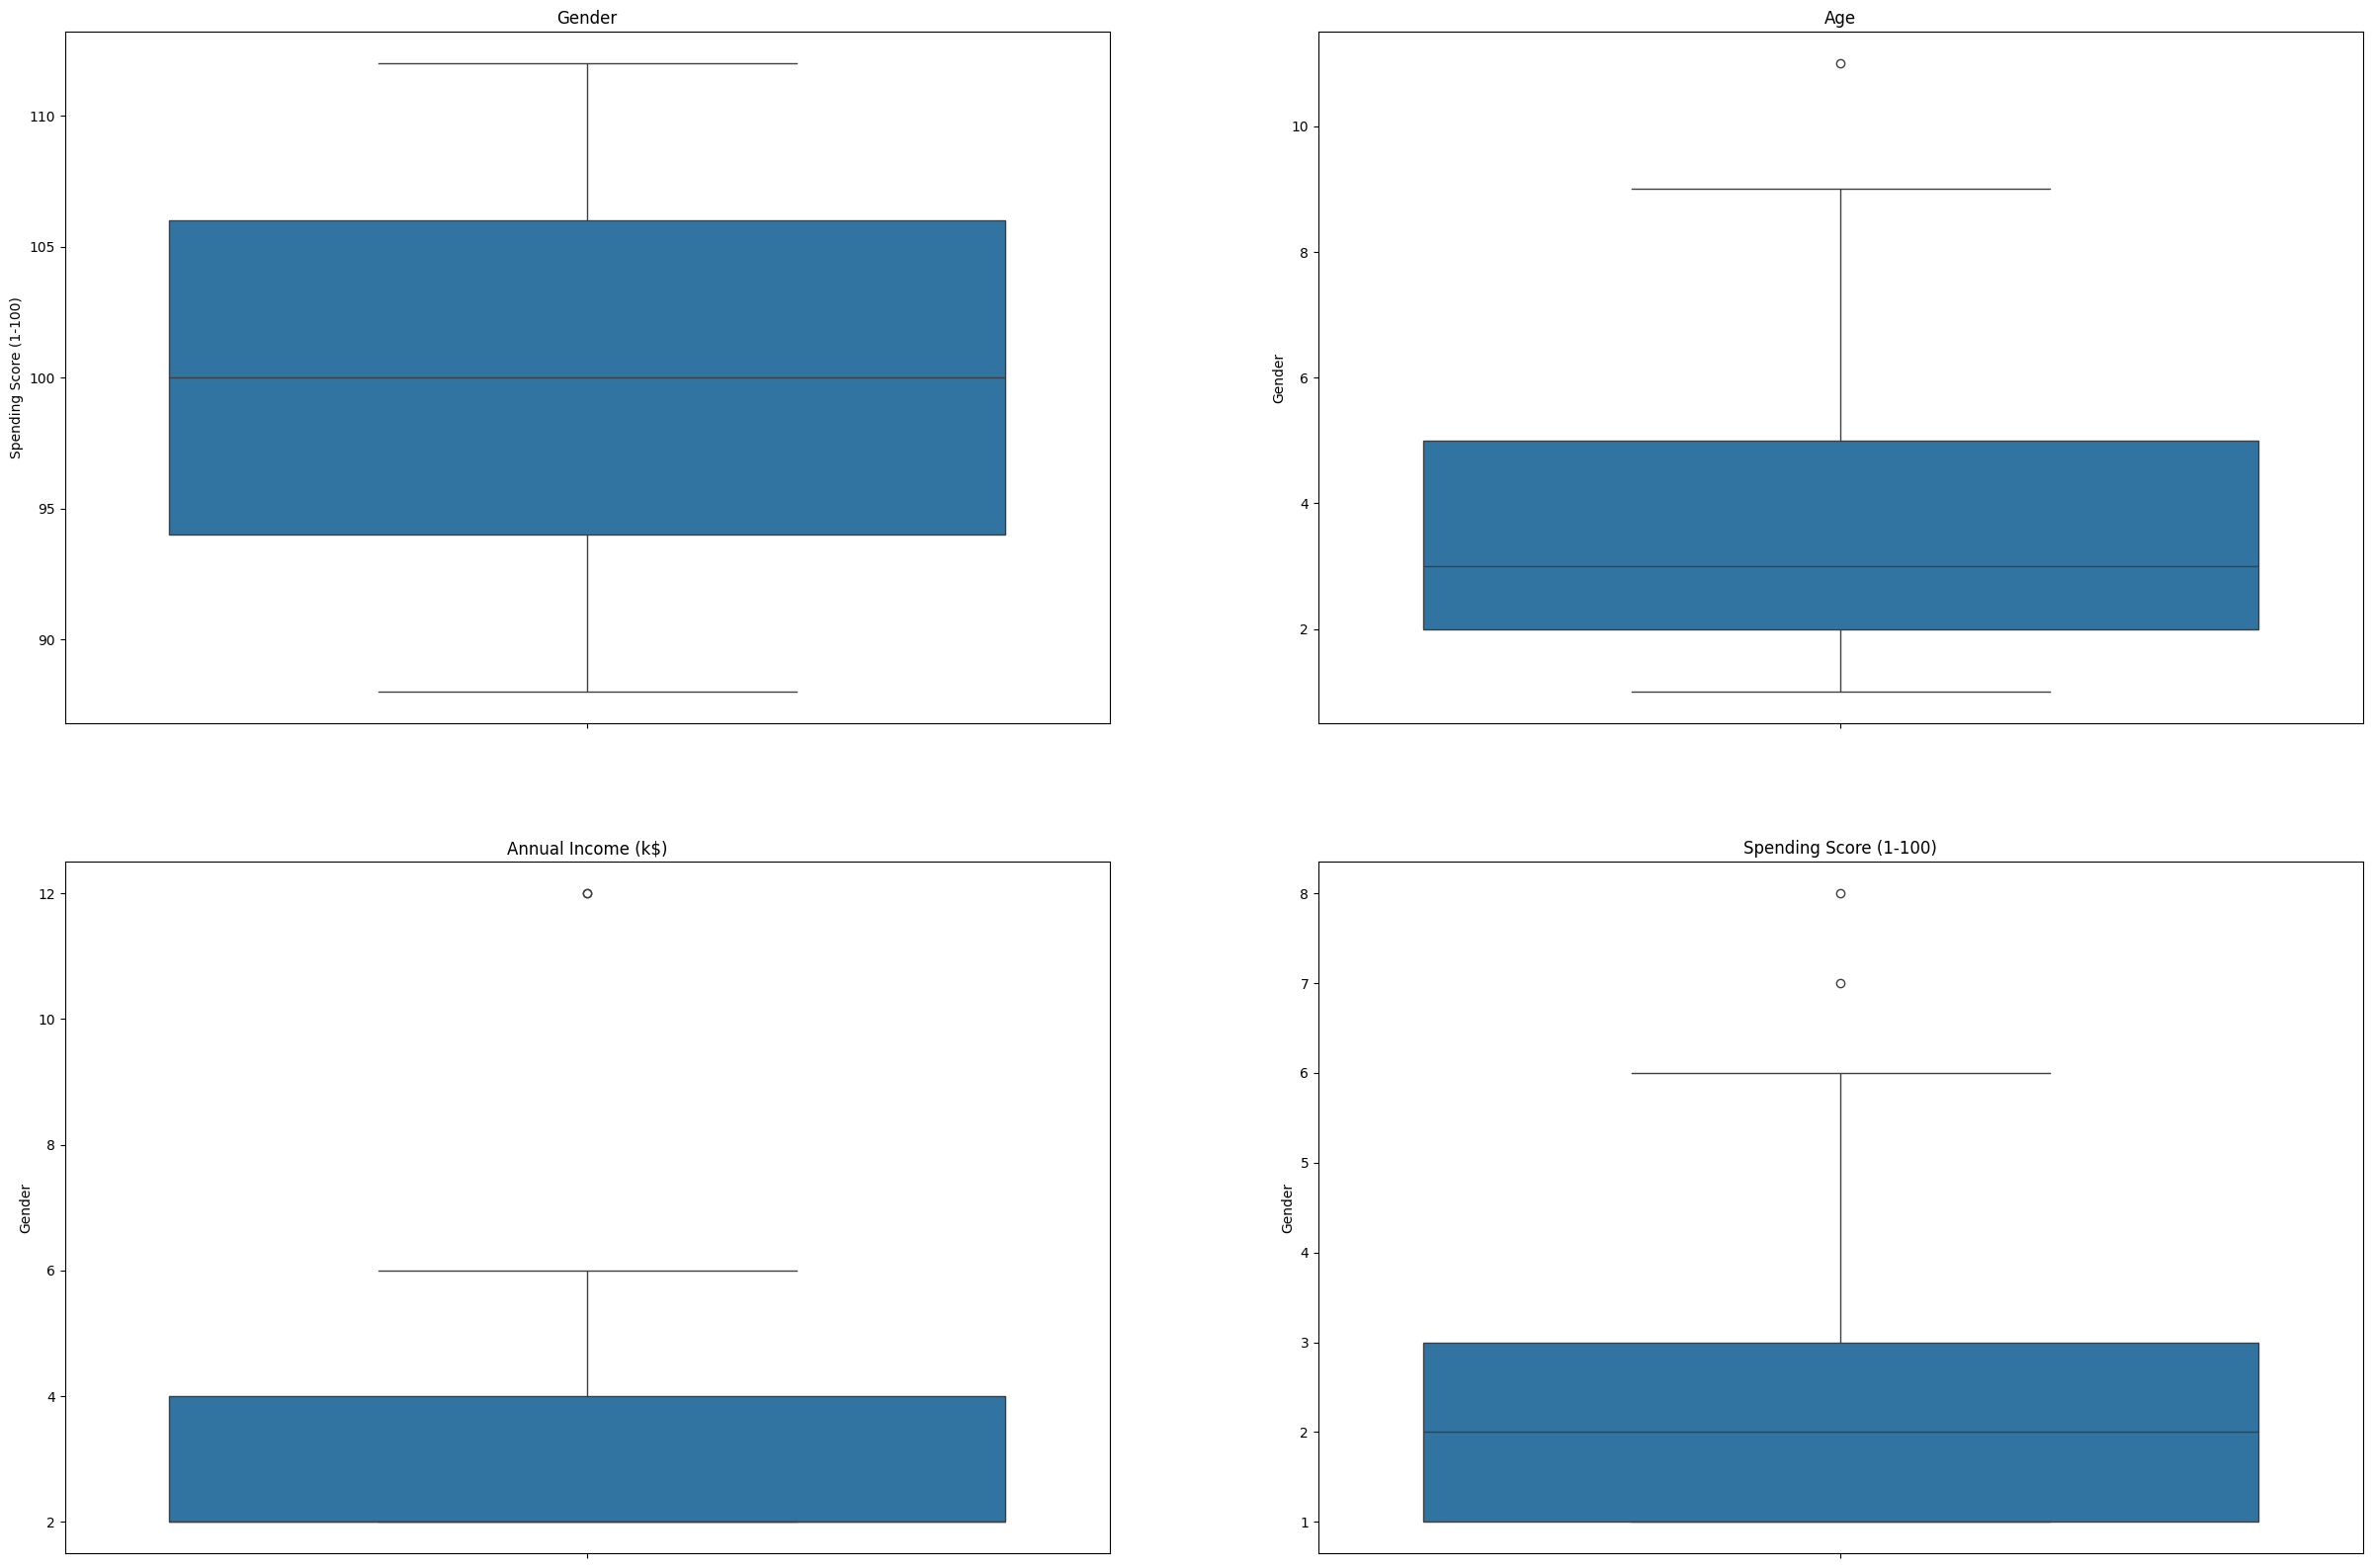

In [5]:
Datos_atipicos(dataset=dt.iloc[:,1:],num_x=2,num_y=2)


In [6]:
def atipicos_hist_box(dataset,list_atipicos:list):
    fig,ax=plt.subplots(len(list_atipicos),2,figsize=(30,20))

    # Mostrar datos
    for x in range(len(list_atipicos)):
        # Grafica de campana de gauss
        sns.histplot(dataset,x=list_atipicos[x],kde=True,ax=ax[x,0])
        # Grafica del boxplor
        sns.boxplot(dataset,x=list_atipicos[x],ax=ax[x,1])
        plt.subplots_adjust(hspace=0.5)  # Ajusta el espaciado vertical


        # agregar un titulo
        ax[x,0].set_title("analisis columna "+list_atipicos[x],fontsize=20,fontweight='bold')



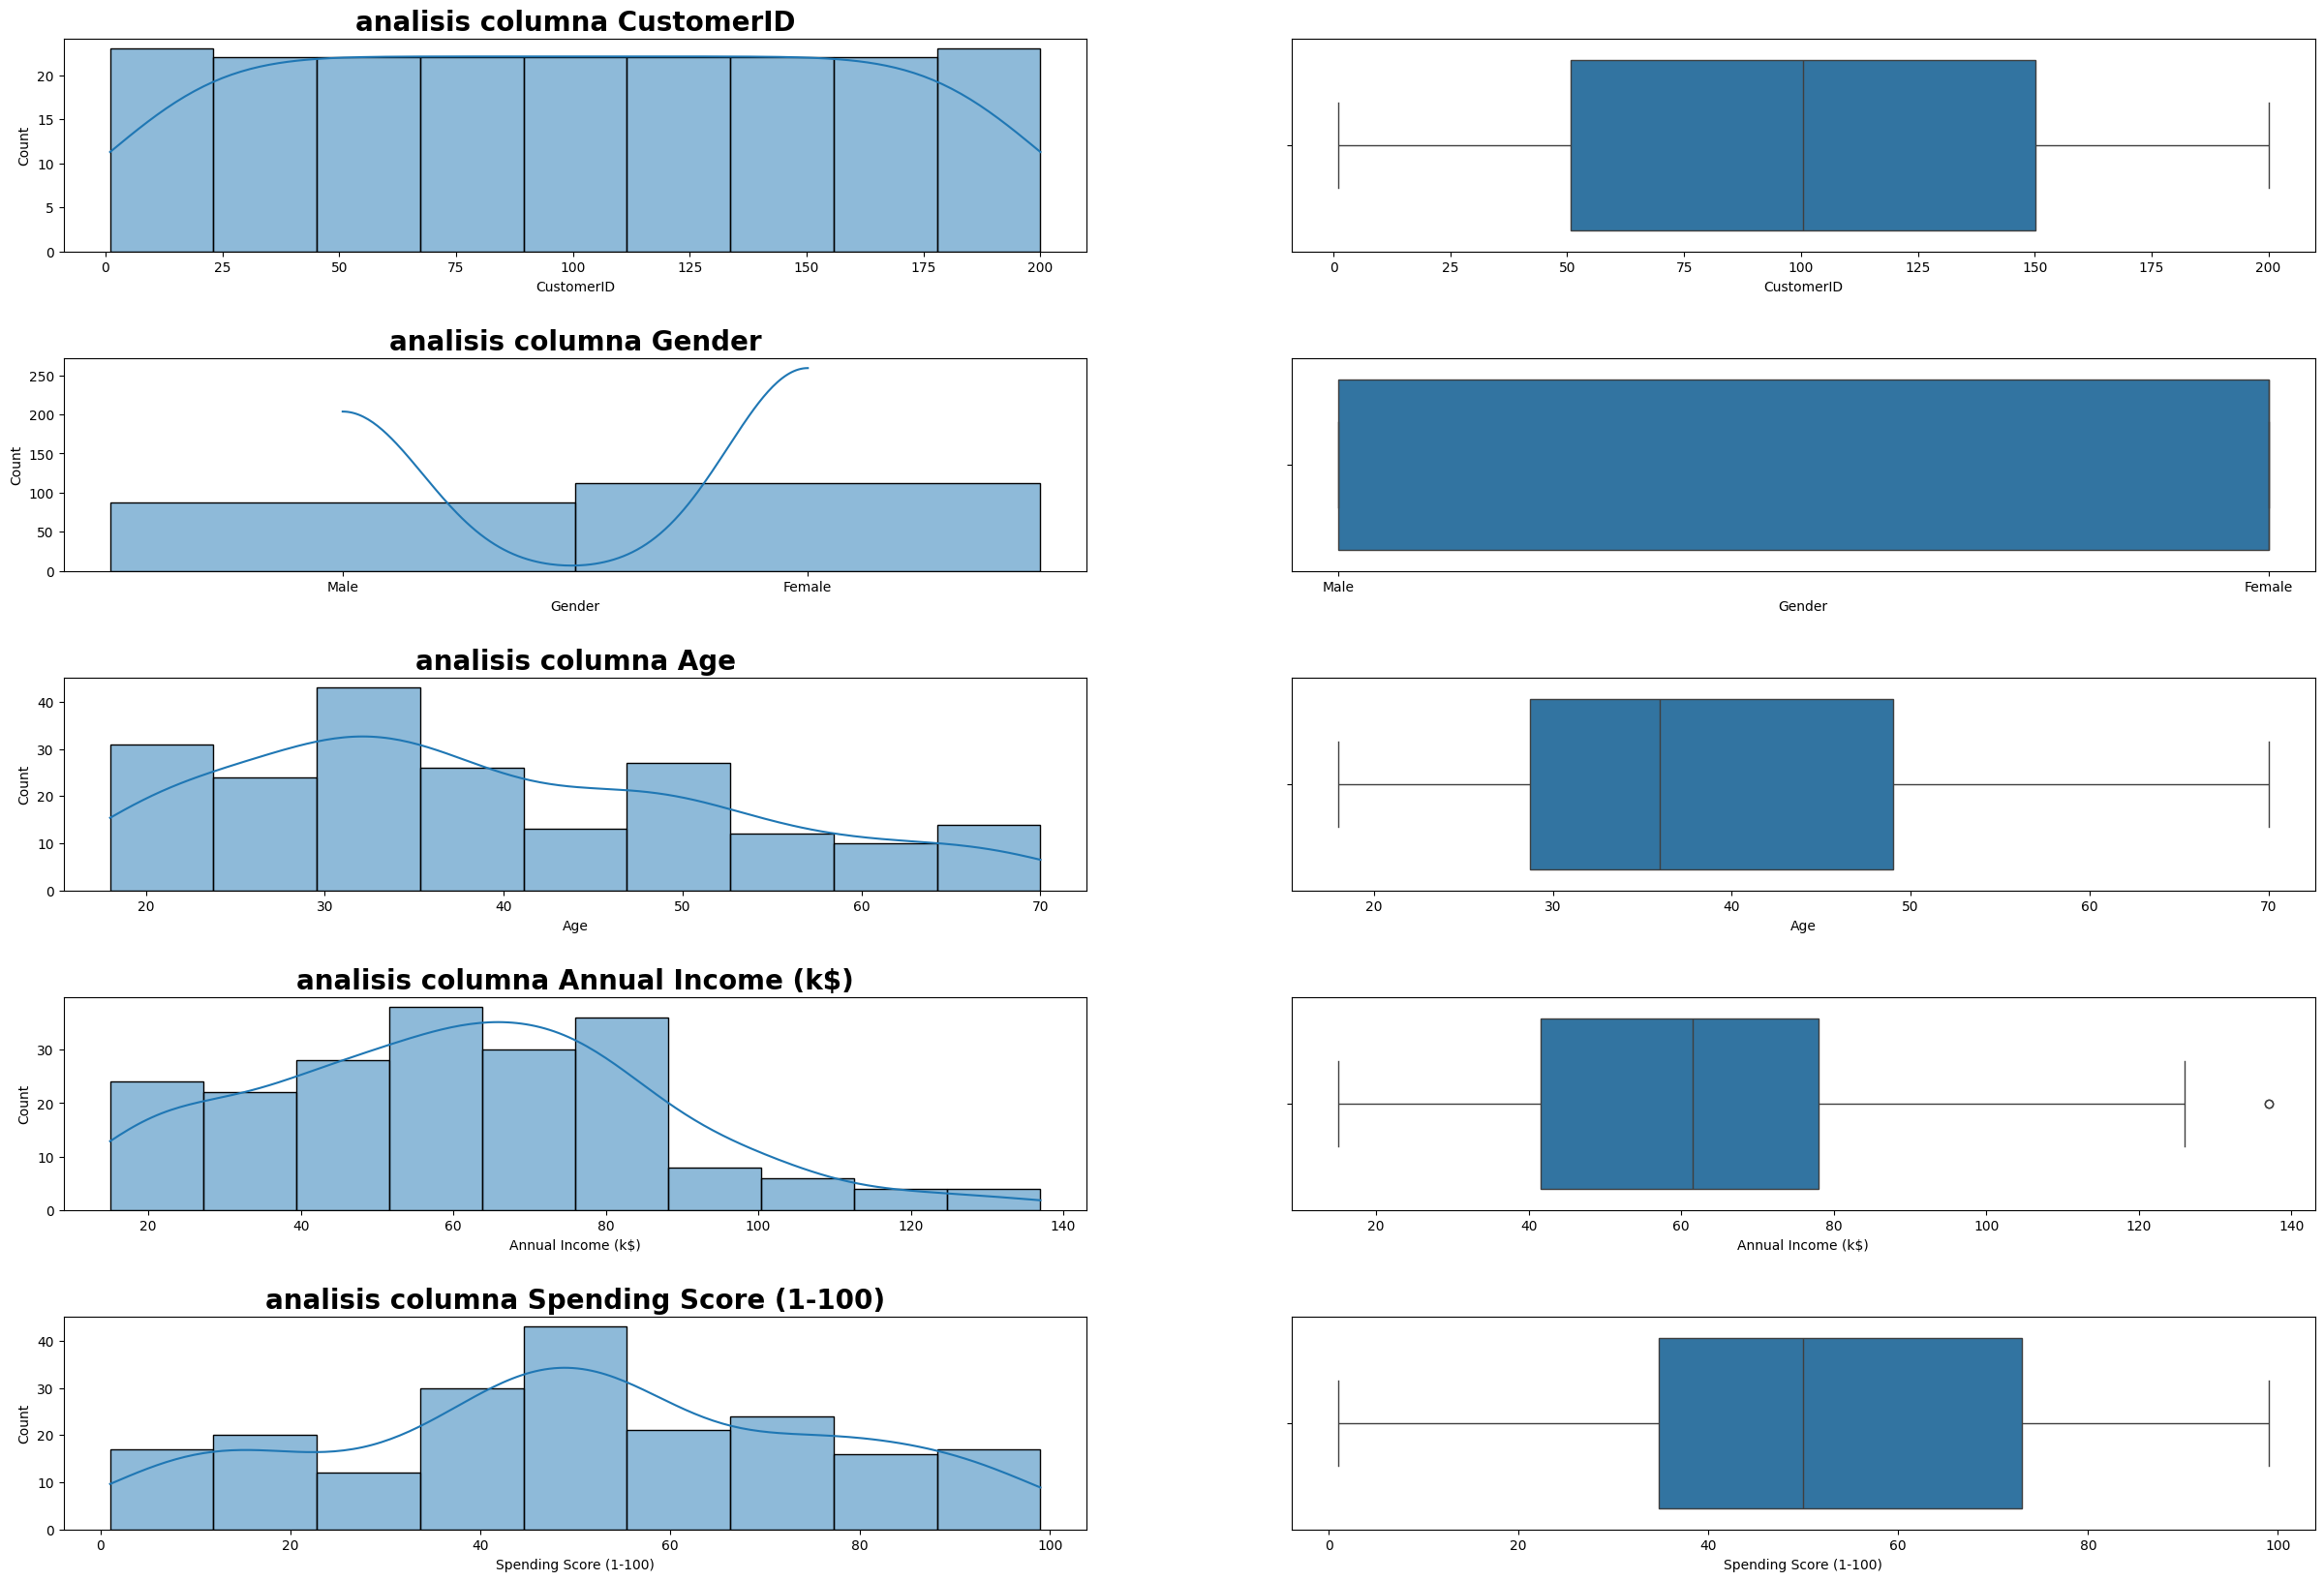

In [7]:
atipicos_hist_box(dataset=dt,list_atipicos=dt.columns)


Como conclusion de esta fase vemos que no hay mucha informacion que modificar, no hay existencia de datos nulos y tampoco hay veracidad de algun dato atipico, por ende pasaremos al analisis **Univariable**

## Analisis Univariable
***
Ahora analizaremos la cosntitucion de los datos por su columna, es decir la conformacion, media,moda y mediana asi como su tendencia con la desviacion estandar


#### Analisis de Genero
El identificar le genero predominanate en los clientes nos puede valer como una gran carta, dado que con ello podremos deducir en que tipo de servicios seran los mas vedndido

Text(0.5, 1.0, 'Analisis de identificacion de grupo de genero')

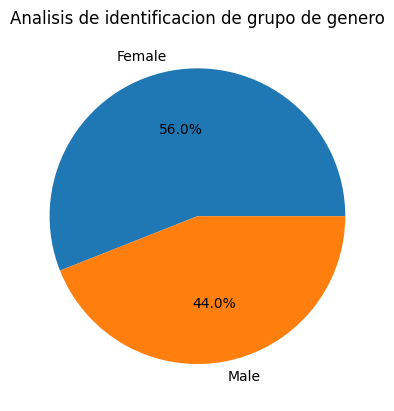

In [8]:
grupo_por_genero = dt.groupby('Gender').count()['Age'].reset_index()
plt.pie(grupo_por_genero['Age'],labels=grupo_por_genero['Gender'],autopct='%1.1f%%')
plt.title("Analisis de identificacion de grupo de genero")


Como conclusion temprana, evidenciamos un mayor grupo de mujeres que de hoombres, donde las mujeres representan el `56%` equivalente a `112` de los datos, miestras que los hombres el `44%` equivalente a `88` restante.


#### Analisis por Grupo de edad
***
Al igual que el factor anterior el identificar el grupo de edad que mas hay entre nuestros clientes, nos puede dar un indicio de hacia donde hay que dirigir la compra y ventas de nuestos productos

C:\Users\Carlos\AppData\Local\Temp\ipykernel_18836\3338487110.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grupo_edad['Age'],ax=ax[0],shade=True)


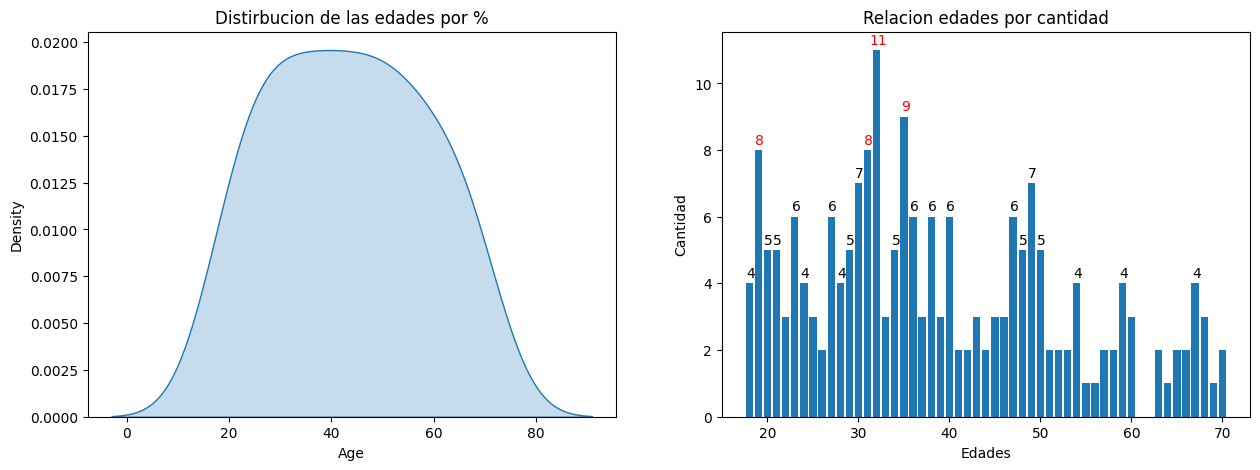

In [9]:

#extraer variables
grupo_edad = dt.groupby('Age')['Gender'].count().reset_index()
#Crear grafica 
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(grupo_edad['Age'],ax=ax[0],shade=True)
ax[1].bar(grupo_edad['Age'],grupo_edad['Gender'])

# Titulares
ax[1].set_title("Relacion edades por cantidad")
ax[0].set_title("Distirbucion de las edades por %")

plt.xlabel('Edades')
plt.ylabel("Cantidad")
#mostrar texto
func =lambda valor: np.where(valor > grupo_edad['Gender'].mean(),valor,"")
func_color = lambda valor: np.where(valor > grupo_edad['Gender'].quantile(0.9),'red','black')

for x in ax[1].patches:
    ax[1].text(x.get_x()+x.get_width()/1.5,x.get_height()+0.3,func(x.get_height()),color=str(func_color(x.get_height())),ha='center',va='center')



In [10]:
print(f"Valor promedio de la edad: {round(dt['Age'].mean())}")


Valor promedio de la edad: 39


**Conclusion de la fase:**

Como evidenciamos en la grafica, encontramos que hay un rango muy grande en la edad, dado qeu vemos que la mayoria tiene entre `25 años` y `40 años` donde la moda y la mediana estan entre los `30 años`.

In [11]:
func_delimitar = lambda x : np.where(x <= 35,'Adulto joven',np.where(x<= 50,'Adulto',np.where(x<=60,'Adulto mayor','Anciano')))
dt['Grupo_edades'] = dt['Age'].apply(func_delimitar)


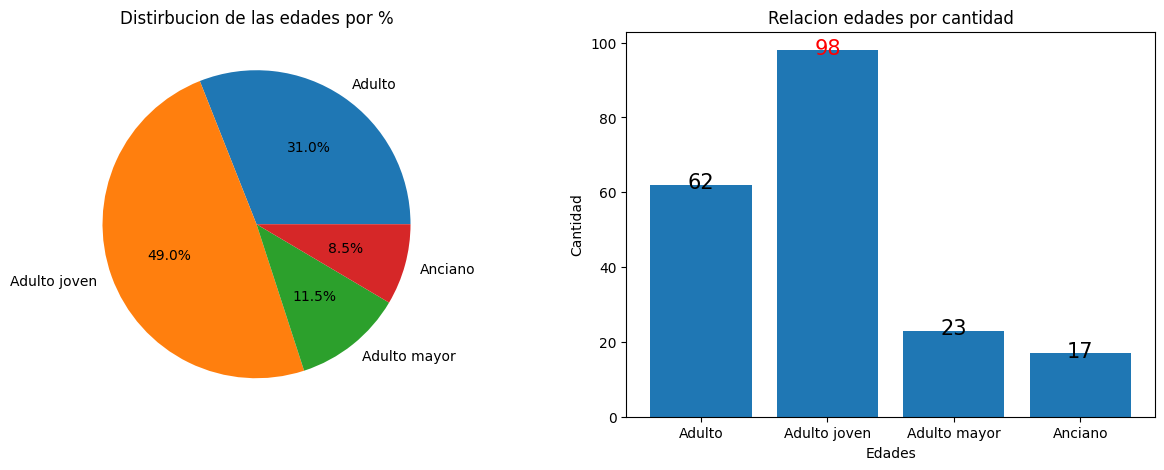

In [12]:
#extraer variables
grupo_edad = dt.groupby('Grupo_edades')['Gender'].count().reset_index()
#Crear grafica 
f,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].pie(grupo_edad['Gender'],labels=grupo_edad['Grupo_edades'],autopct='%1.1f%%')
ax[1].bar(grupo_edad['Grupo_edades'],grupo_edad['Gender'])

# Titulares
ax[1].set_title("Relacion edades por cantidad")
ax[0].set_title("Distirbucion de las edades por %")

plt.xlabel('Edades')
plt.ylabel("Cantidad")
#mostrar texto
func =lambda valor: np.where(valor > grupo_edad['Gender'].mean(),valor,"")
func_color = lambda valor: np.where(valor > grupo_edad['Gender'].quantile(0.9),'red','black')

for x in ax[1].patches:
    ax[1].text(x.get_x()+x.get_width()/2,x.get_height()+0.5,str(x.get_height()),color=str(func_color(x.get_height())),ha='center',va='center',fontsize=15)


#### Analisis de Ingreso anual
****
Ahora analizaremos el ingreso anual que suelen tener nuestros clientes, estos nos ayudara a identificar cuantos son las ganacias de nuestros clientes para asi poder ajustar los precios a ellos

C:\Users\Carlos\AppData\Local\Temp\ipykernel_18836\323249480.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grupo_ingreso_anual['Annual Income (k$)'],ax=ax[0],shade=True,color='salmon')


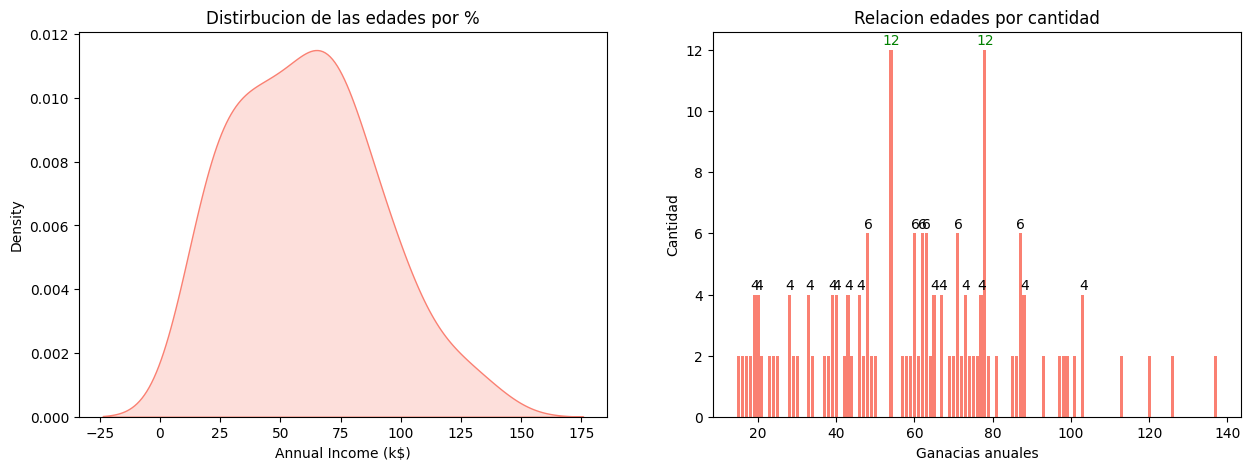

In [13]:
grupo_ingreso_anual = dt.groupby('Annual Income (k$)')['Gender'].count().reset_index()
grupo_ingreso_anual = grupo_ingreso_anual.sort_values(by='Annual Income (k$)')
#Crear grafica 
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(grupo_ingreso_anual['Annual Income (k$)'],ax=ax[0],shade=True,color='salmon')
ax[1].bar(grupo_ingreso_anual['Annual Income (k$)'],grupo_ingreso_anual['Gender'],color='salmon')
# Titulares
ax[1].set_title("Relacion edades por cantidad")
ax[0].set_title("Distirbucion de las edades por %")


plt.xlabel('Ganacias anuales')
plt.ylabel("Cantidad")
#mostrar texto
func =lambda valor: np.where(valor > grupo_ingreso_anual['Gender'].mean(),valor,"")
func_color = lambda valor: np.where(valor > grupo_ingreso_anual['Gender'].quantile(0.9),'green','black')

for x in ax[1].patches:
    ax[1].text(x.get_x()+x.get_width()/1.5,x.get_height()+0.3,func(x.get_height()),color=str(func_color(x.get_height())),ha='center',va='center')


In [14]:
print(f"Valor Anual promedio: ${grupo_ingreso_anual['Annual Income (k$)'].mean()}")
print(f"Evaluacion de la desvicion estandar: ${grupo_ingreso_anual['Annual Income (k$)'].std()}")


Valor Anual promedio: $60.515625
Evaluacion de la desvicion estandar: $29.631060594992665


**Conclusion del analisis:**

Como conclusion encontramos que la mayor parte de los clientes tiene una ganacias anuales de entre `$60.000` - `$89.000` USD, no obstante, no es la unica buena noticia, dado que gracias a nuestro analisis sobre la desviacion estandar encontramos que hay una tendencia de crecimiento `$29.000`USD lo que significa que a futuro esperamos que el cambio del promedio del salario anual de nuestro clientes sea d `$89.000`

#### Analisis Spending Score
****
Por ultimo analizaremos el como estna distribuidas la puntuacion suminitrada por el centro comercial

C:\Users\Carlos\AppData\Local\Temp\ipykernel_18836\3926997441.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dt['Spending Score (1-100)'],shade=True,color='Lightgreen')


Text(0.5, 1.0, 'Distribucion del puntaje por datos')

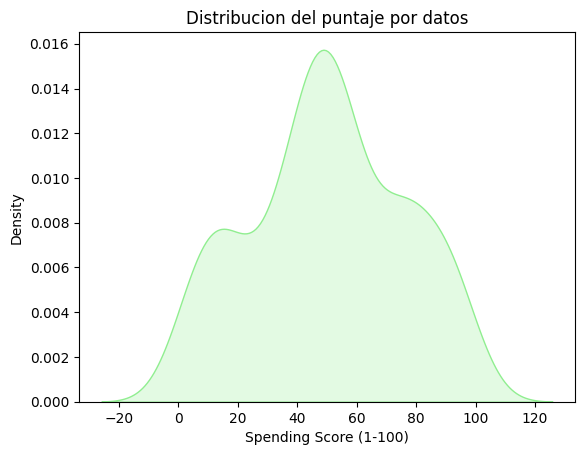

In [15]:
sns.kdeplot(dt['Spending Score (1-100)'],shade=True,color='Lightgreen')
plt.title("Distribucion del puntaje por datos")


In [16]:
print(f"Valor pormedio de los puntajes: {dt['Spending Score (1-100)'].mean()}")
print(f"Desviacion estandar de los puntajes: {dt['Spending Score (1-100)'].std()}")


Valor pormedio de los puntajes: 50.2
Desviacion estandar de los puntajes: 25.823521668370173


**Conclusion de la fase:**

Como conclusion del analisis de la fase anterior  encontramos que la mayoria de nuestro clientes tiene una puntunacion de `50`, no obstante, vemos que hay un cremciento de `25` en los participantes, esto quiere decir que un futuro, el promedio de estos datos pasaran de  mas de `50` puntos y menos de `75` puntos, lo que los posciciona bastante bien a un futuro cercano. 

## Analisis Multivariable
****
Ahora analizaremos la relacion existente entre las variables que previamente analizamos y buscaremos patrones que nos ayuden a idnetificar, posibles grupos y el tamaño de los mismo. 

#### Analisis de gastos anual en relacion a la puntuacion
****
Una de la primeras incognitas que  me paso por la cabeza a la hora de crear este analisis fue el de determinar si existe alguna relacion que una  las puntuaciones asginadas con las ganancias de los clientes.

Text(0.5, 1.2, 'Relacion entre las ganancias anuales y el puntaje obtenido por compra')

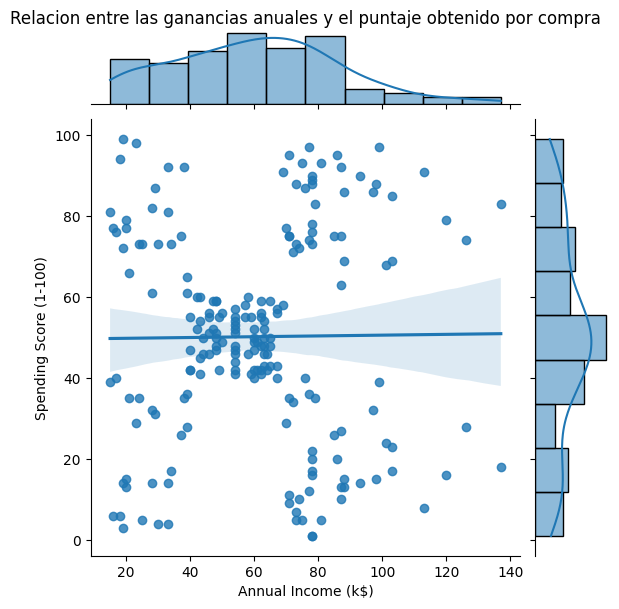

In [17]:
sns.jointplot(data=dt,x='Annual Income (k$)',y='Spending Score (1-100)',kind='reg')
plt.title("Relacion entre las ganancias anuales y el puntaje obtenido por compra",y=1.2)


**Analisis de correlacion entre las variables:**
Como vemos en la grafica, la recta que representa la prediccion que existe entre el promedio de los datos, como podemos inferir diriamos que la pendiente (_que es la que determnina la direccion de la recta_), vemos que tiene a cero lo que nos da a entender que no exite ninguna relacion a priori.

Para poder profundizar mas en esto, evaluaremos las **correlaciones**, la cual nos dira la magnitud de la relacion y la direccion de la misma, para ello usaremos la correlacion de pearson (_que analiza una correlaion lineal_) y la de Spearman (_que analiza una correlacion no lineal)

Text(0.5, 1.0, 'Correlacion de Spearman')

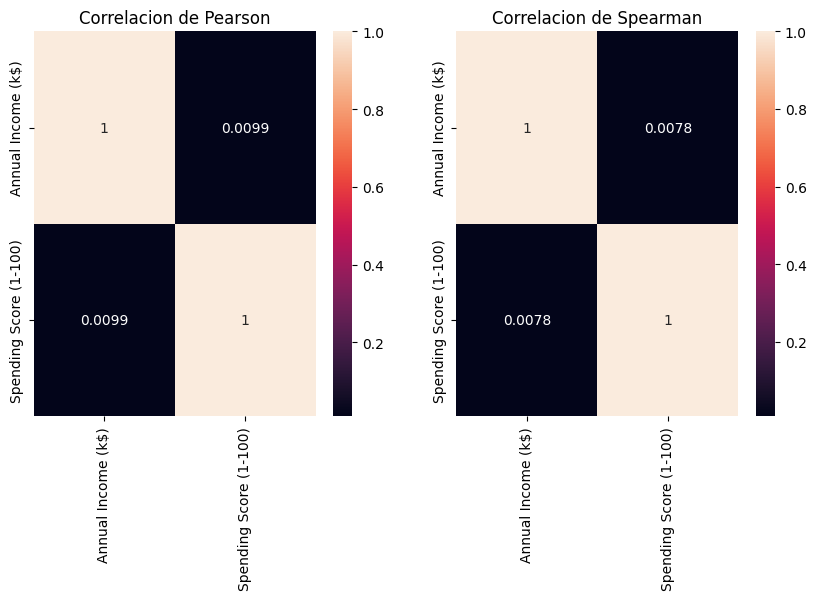

In [18]:
correlacion_P=dt.iloc[:,3:-1].corr('pearson')
correlacion_S=dt.iloc[:,3:-1].corr('spearman')

f,ax = plt.subplots(1,2,figsize=(10,5))
sns.heatmap(correlacion_P,annot=True,ax=ax[0])
sns.heatmap(correlacion_S,annot=True,ax=ax[1])
#titulos
ax[0].set_title("Correlacion de Pearson")
ax[1].set_title("Correlacion de Spearman")


**Conclusion de la figura anterior**

Como eviendenciamos en la grafica anterior encontramos que no existe ningun tipo de relacion entre la puntuacion y los ingresos anuales.Esto nos da a suponer que dado que no exite ninguna relacion, entre las columnas es inutil el analizar las ganacias anuales dado el genero, esto ya que nuestro interes es en determinar los grupos de consumo.

#### Relacion Entre el puntaje de consumo con respecto a al edad 
****
Dado que ahora asabemos que no exite una relacion clara  entre la columna de ingresos y de la puntuacion, nos tocara averiguar cuales son esos factores que determinan la puntuacion entre los clientes.

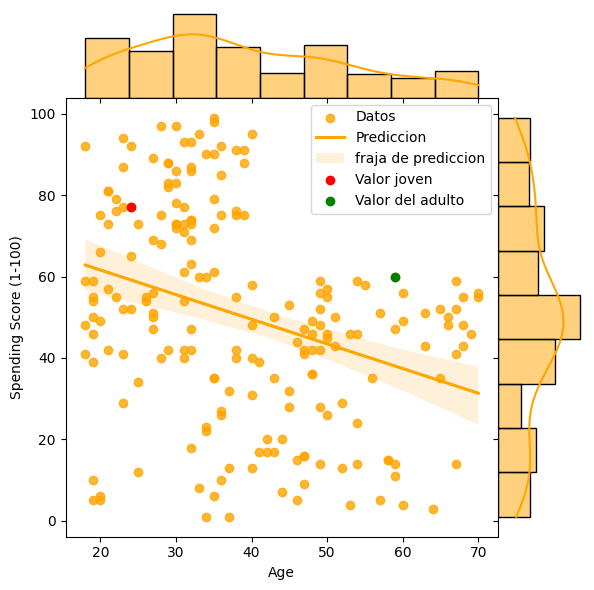

In [19]:

sns.jointplot(data=dt,x='Age',y='Spending Score (1-100)',kind='reg',color='orange',space=0)
plt.scatter(x=24,y=list(dt[dt['Age'] ==24]['Spending Score (1-100)'])[0],color='red')
plt.scatter(x=59,y=list(dt[dt['Age'] ==59]['Spending Score (1-100)'])[0],color='green')
plt.legend(['Datos','Prediccion','fraja de prediccion','Valor joven','Valor del adulto'])



Text(0.5, 1.0, 'Correlacion')

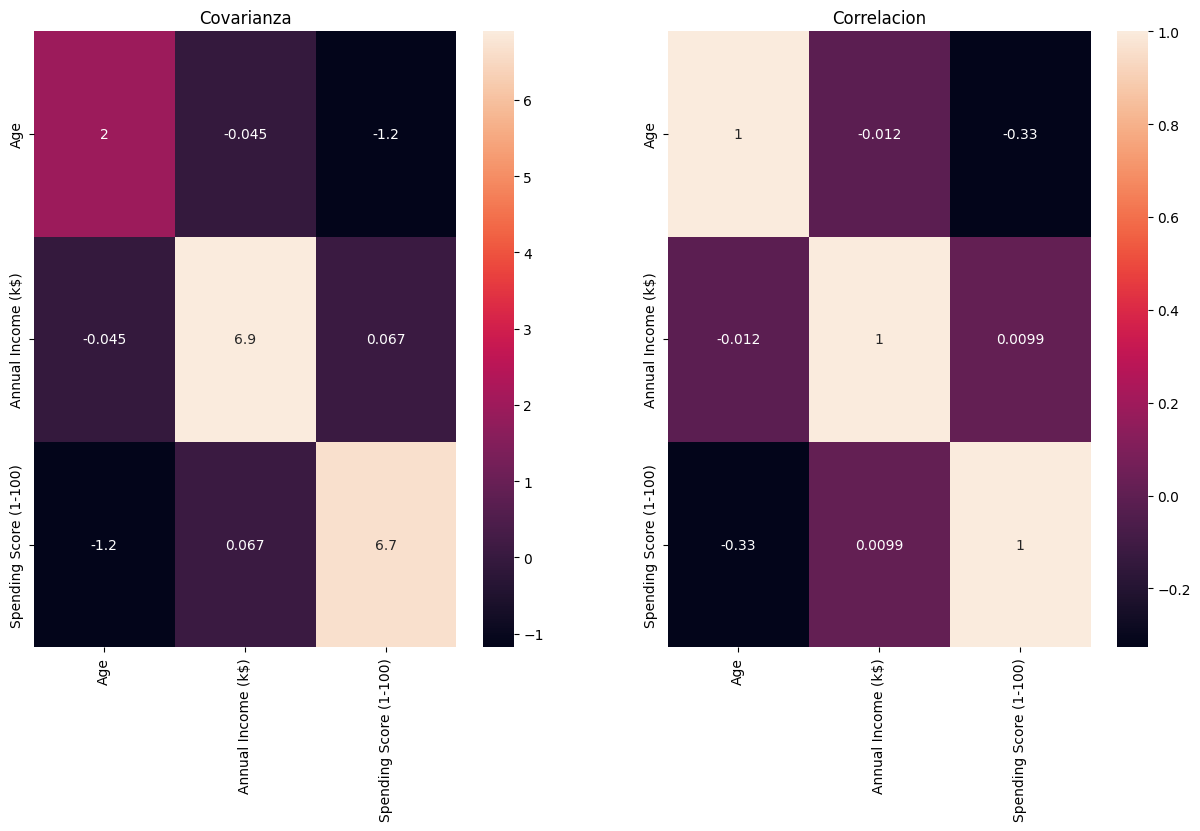

In [20]:
#extraccion de corrlelaicon y covarianza 
correlacion = dt.iloc[:,2:5].corr()
covarianza = dt.iloc[:,2:5].cov().apply(lambda x: x/100)

f,ax= plt.subplots(1,2,figsize=(15,8))
sns.heatmap(correlacion,annot=True)
sns.heatmap(covarianza,annot=True,ax=ax[0])
#tituls
ax[0].set_title("Covarianza")
ax[-1].set_title("Correlacion")


**Conclusion del analisis**

Como vemos en la grafica  encontramos que la relacion entre los clientes y el puntaje obtenido es inversamente propoprcional con una diferencia equivalente a un `33%`, es decir, que un joven de _24_ años   tiene un minimo `33%` mas puntaje que un adulto de _59_ años; lo cual nos da a entender que son los jovenes los que mas tiene en cuenta este puntaje

#### Relacion Genero con el puntaje obtenido
****
Ahora que sabemos quienes son los clientes con mayor puntaje nos queda una ultima pregunta por resolver el cual es: _¿Quien gasta mas?_ _¿Caballeros o damas?_

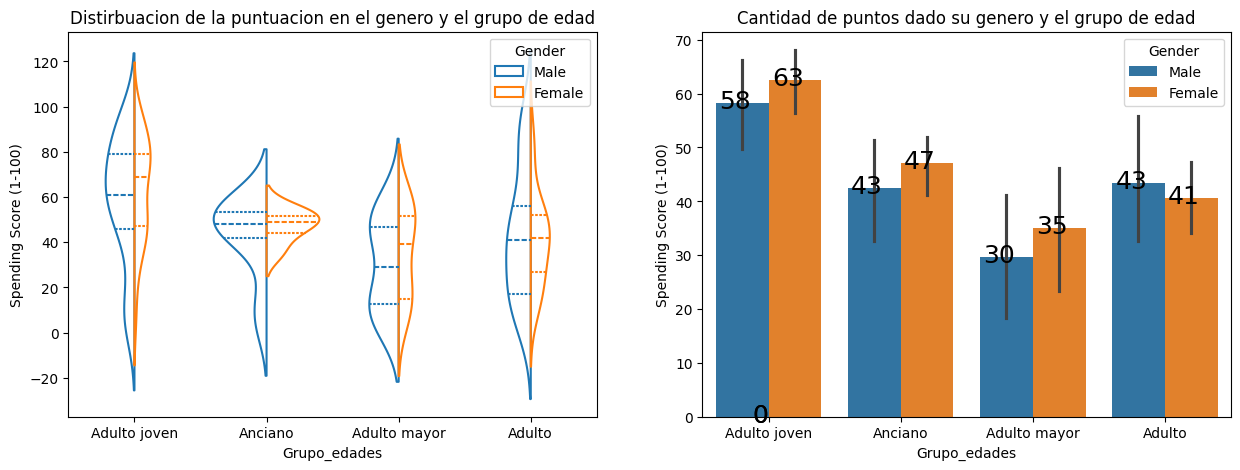

In [21]:
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(data=dt,hue='Gender',y='Spending Score (1-100)',x='Grupo_edades')
sns.violinplot(data=dt,x='Grupo_edades',y='Spending Score (1-100)',fill=False,split=True,hue='Gender',inner='quart',ax=ax[0])

ax[0].set_title("Distirbuacion de la puntuacion en el genero y el grupo de edad")
plt.title("Cantidad de puntos dado su genero y el grupo de edad")

for x in ax[1].patches:
    ax[1].text(x.get_x()+x.get_width()/1.5,x.get_height()+0.3,round(x.get_height()),color='black',ha='right',va='center',fontsize=18)


Text(0.5, 1.0, 'Analisis de curtosis')

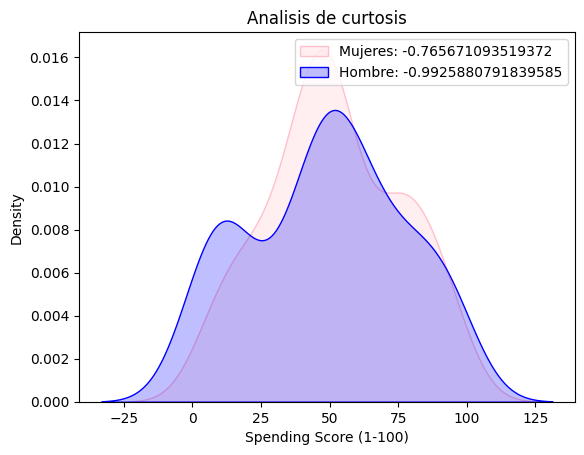

In [22]:
curtosis_mujer =stats.kurtosis(dt[dt["Gender"]=="Female"]['Spending Score (1-100)'])
curtosis_hombre = stats.kurtosis(dt[dt["Gender"]=="Male"]['Spending Score (1-100)'])

sns.kdeplot(dt[dt["Gender"]=="Female"]['Spending Score (1-100)'],fill=True,color='pink',label=f"Mujeres: {curtosis_mujer}")
sns.kdeplot(dt[dt["Gender"]=="Male"]['Spending Score (1-100)'],fill=True,color='blue',label=f"Hombre: {curtosis_hombre}")
plt.legend()
plt.title("Analisis de curtosis")


**Conclusion del analisis**

Como evidiencia del analisis anterio _sobre el genero_ ya habiamos descubierto que entre los clientes habian mas muejeres que hombres, no obstante no sabiamos como estos se agrupanaba por edades y por puntaje si vemos en la grafica de violin, encontramos que existe una curtosis negtiva lo que para nuestro caso significa que hay mas rango de valores o de puntajs en ese genero.
Es decir, con una curtosis de `-0.76` para las mujeres y de `-0.99` para los hombres nos esta mencionanado que el puntaje de las mujeres tiende mas a acercarse al promedio de la puntuacion (_la cual era del `50`_)

## Creacion del modelo de Clustering
***
Ahora que ya sabemos cuales son las columans de interes, y que ya sabemos cual va a ser la tendencia frente a por ejemplo la relacion entre los clientes y la puntuacion. Podemos porceder a crear un modelo que nos ayude a agrupar los clientes

In [23]:
from sklearn.preprocessing import OneHotEncoder # Traducri datos a numeros
from sklearn.cluster import AgglomerativeClustering #El clustering
from sklearn.metrics import silhouette_score,calinski_harabasz_score #EValauar el modelo
from sklearn.pipeline import Pipeline #Crar un modelo mas complejo
from sklearn.compose import ColumnTransformer # Extraccion de columna objetivo


### Preparacion del modelo
****
Ahora buscaremos que para que sea mas sencillo para las presnonas del supermercado, haremos que el modelo de manera interna convienrta todos eso datos de texto (_como lo son la columna de gender y de grupo de edade_) a numeros y que posterior a esos a la respectiva clusterisacion

In [24]:
#preprosecing de las tabla Gender y Grupo_edades
encoder_gender = Pipeline(steps=[('onehot',OneHotEncoder())])
encoder_grupo = Pipeline(steps=[('onehot',OneHotEncoder())])

# Seleccionar las columnas a la s que se les aplicara el encoder
preprocessing = ColumnTransformer(transformers=[
    ('Gender',encoder_gender,['Gender']), # nombre de la funcion, funcion que se le aplicara, y columna a la que se refiere
    ('Grupo_edades',encoder_grupo,['Grupo_edades'])
])



### **Preparacion de los datos y validacion del modelo**
****
Ahor que ya tenemos el modelo casi listo, debemos delimtar los datos que vamos a usar y tambien determinar cual es el numero optimio de grupos que hemos de crear para que el modelo agrupe, para ello nos apoyaremos de dos metricas.

* _Shilhouette_: el cual analiza desde -1 a 1 el coportamiento de grupos y si categoriza bien o no, para este caso  buscaremos valores que mas se acerquen a 1 

* _Calinski_: Esta metrica nos permite analizar la logica que hay detras de los grupos, es decir, nos sugiere una estructura  que sea facil de entender, esta metrica va desde 0 hasta infinito entre mas grande el valor mejor sera su compresion


In [25]:
data=dt[['Gender',"Age","Spending Score (1-100)","Grupo_edades"]]


In [26]:
analisis_s = []
analisis_c =[]

#entrenamiento
for x in range(2,12):
    # Creacion del modelo de clustering
    model =Pipeline(steps=[('preprocessing',preprocessing),('modelo',AgglomerativeClustering(n_clusters=x))]) # agregamos el onehotencoder y el clustering
    #seccion de prediccion del modelo
    model.fit(data)
    y_prediccion=model.fit_predict(data)
    #seccion de analisis
    datos_transformados=model.named_steps['preprocessing'].transform(data)
    datos_analisis=np.concatenate((np.array(dt[["Age","Spending Score (1-100)"]]),datos_transformados),axis=1)
    resultado_s=silhouette_score(datos_analisis,y_prediccion)
    resultado_c = calinski_harabasz_score(datos_analisis,y_prediccion)
    #guardar analisis
    analisis_s.append([x,resultado_s])
    analisis_c.append([x,resultado_c])


In [27]:
analisis_s


[[2, 0.038882280382104374],
 [3, -0.04804926113377582],
 [4, -0.021658933847233556],
 [5, 0.001608025727559279],
 [6, -0.018069209316100864],
 [7, -0.04244227318630186],
 [8, -0.1015086988015943],
 [9, -0.2151358038791868],
 [10, -0.38449018178561717],
 [11, -0.4215578071637776]]

<Axes: title={'center': 'Analisis Calinski'}, xlabel='N_cluster', ylabel='Valor'>

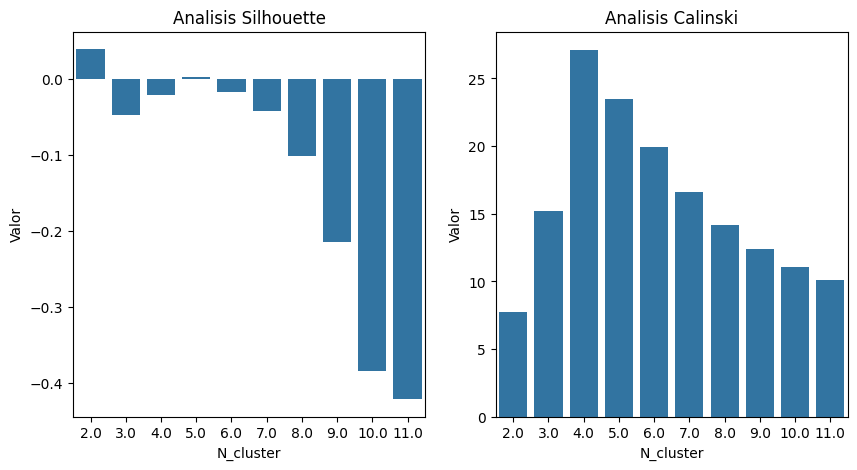

In [28]:
analisis_s = pd.DataFrame(np.array(analisis_s),columns=['N_cluster','Valor'])
analisis_c = pd.DataFrame(np.array(analisis_c),columns=['N_cluster','Valor'])
f,ax = plt.subplots(1,2,figsize=(10,5))
#titulos
ax[0].set_title("Analisis Silhouette")
ax[-1].set_title("Analisis Calinski")
#figura
sns.barplot(data=analisis_s,x='N_cluster',y='Valor',ax=ax[0])
sns.barplot(data=analisis_c,x='N_cluster',y='Valor')


**Conclusion de la fase:**
Ahora que ya hemos visto los dos anlisis con base a disitintos numeros de cluster vemos que hay una clara dicotomia, donde por un lado silhoutte nos dice que el mejor numero de cluster es o bien 2 o 5, mientras que por otro lado el analisis de calinski no menciona que le mejor numero de cluster es 4; entonces lapregunta es **_¿A quien deberia creerle?_**

Para este caso debemos plantear el problema, y con base en ello hacer una seleccion; dado que nuestro problema tener el mayor numero de grupo de clientes podriamos, almacenarlos en 5 grupos dado que simiramos el silhoutte son grupos que no son ni muy buneos pero tampoco muy malos y por otro lado en el Calinski nos dice que  suvalor rondan entre los 20 y 25

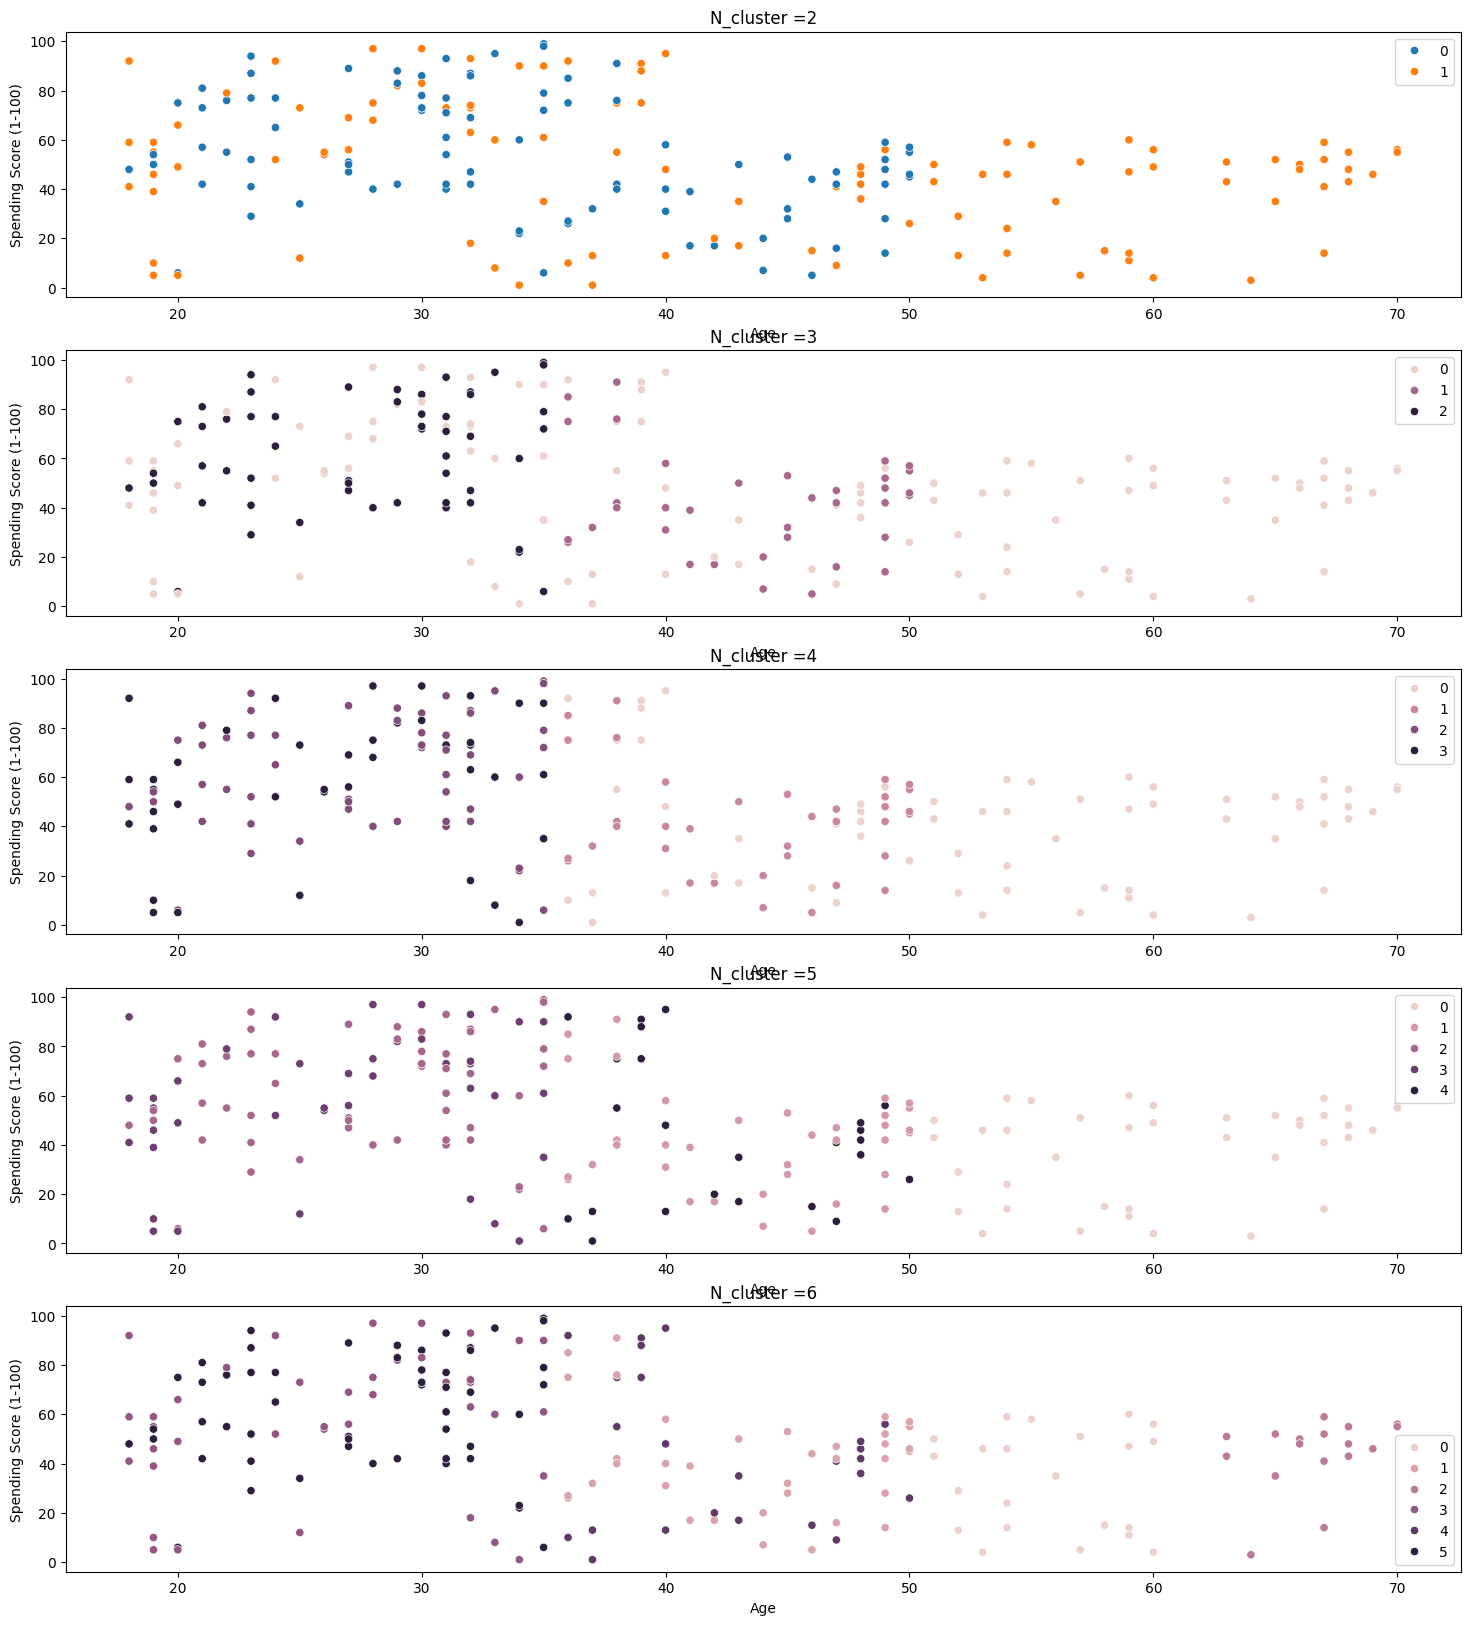

In [29]:
f,ax = plt.subplots(5,1,figsize=(18,20))
for x in range(2,7):
    # Creacion del modelo de clustering
    model =Pipeline(steps=[('preprocessing',preprocessing),('modelo',AgglomerativeClustering(n_clusters=x))]) # agregamos el onehotencoder y el clustering
    # model = AgglomerativeClustering(n_clusters=x)
    #seccion de prediccion del modelo
    model.fit(data)
    y_prediccion=model.fit_predict(data)
    #seccion de analisis
    sns.scatterplot(data=dt,x='Age',y='Spending Score (1-100)',hue=y_prediccion,ax=ax[x-2])
    ax[x-2].set_title(f"N_cluster ={x}")


**Como conclusion**

Como conclusion dle modelo lo mejor sera optar por un numero de cluster iguales a 5 dado que si vemos en la grafica el cluster 6 ya comienza combinar las categorias